<a href="https://colab.research.google.com/github/gbiamgaurav/Feature-Selection/blob/main/Information_Gain_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mutual Information
Estimate mutual information for a continuous target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

Youtube Videos
Entropy: https://www.youtube.com/watch?v=1IQOtJ4NI_0

Information Gain: https://www.youtube.com/watch?v=FuTRucXB9rA

Gini Impurity: https://www.youtube.com/watch?v=5aIFgrrTqOw

Statistical test: https://www.youtube.com/watch?v=4-rxTA_5_xA

https://www.youtube.com/watch?v=YrhlQB3mQFI

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gbiamgaurav","key":"25adcca0b19d33a63cbc1bc66924e01d"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 14.1MB/s]


In [ ]:
! unzip /content/house-prices-advanced-regression-techniques.zip

Archive:  /content/house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

#### Apply to only numerical colums, for that we should create numerical columns

In [ ]:
numerical_cols = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

In [ ]:
numerical_cols = list(df.select_dtypes(include=numerical_cols).columns)

In [ ]:
df = df[numerical_cols]

In [ ]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
numerical_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [ ]:
df.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [ ]:
### It is always a good practise to split train and test data to prevent ovefitting

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=['SalePrice'], axis=1),
                                                    df['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)

In [ ]:
X_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
64,65,60,NaN,9375,7,5,1997,1998,573.0,739,...,645,576,36,0,0,0,0,0,2,2009
682,683,120,NaN,2887,6,5,1996,1997,0.0,1003,...,431,307,0,0,0,0,0,0,11,2008
960,961,20,50.0,7207,5,7,1958,2008,0.0,696,...,0,117,0,0,0,0,0,0,2,2010
1384,1385,50,60.0,9060,6,5,1939,1950,0.0,204,...,280,0,0,0,0,0,0,0,10,2009
1100,1101,30,60.0,8400,2,5,1920,1950,0.0,290,...,246,0,0,0,0,0,0,0,1,2009


In [ ]:
X_train.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      189
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         5
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       54
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [ ]:
from sklearn.feature_selection import mutual_info_regression

### determine the mutual information

mutual_info = mutual_info_regression(X_train.fillna(0), y_train)

In [ ]:
mutual_info

array([0.        , 0.25341365, 0.21030705, 0.16527644, 0.53043512,
       0.10968219, 0.33927127, 0.24725682, 0.10226425, 0.16312579,
       0.0050848 , 0.10984424, 0.3841155 , 0.31153106, 0.2392942 ,
       0.0153938 , 0.48065429, 0.02726359, 0.        , 0.26558442,
       0.08829197, 0.03814007, 0.        , 0.1821176 , 0.18741709,
       0.26443327, 0.36076093, 0.36729122, 0.06792418, 0.17155057,
       0.02729891, 0.00833886, 0.01222275, 0.00722479, 0.        ,
       0.        , 0.01678439])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

OverallQual      0.530435
GrLivArea        0.480654
TotalBsmtSF      0.384115
GarageArea       0.367291
GarageCars       0.360761
YearBuilt        0.339271
1stFlrSF         0.311531
FullBath         0.265584
GarageYrBlt      0.264433
MSSubClass       0.253414
YearRemodAdd     0.247257
2ndFlrSF         0.239294
LotFrontage      0.210307
Fireplaces       0.187417
TotRmsAbvGrd     0.182118
OpenPorchSF      0.171551
LotArea          0.165276
BsmtFinSF1       0.163126
BsmtUnfSF        0.109844
OverallCond      0.109682
MasVnrArea       0.102264
HalfBath         0.088292
WoodDeckSF       0.067924
BedroomAbvGr     0.038140
EnclosedPorch    0.027299
BsmtFullBath     0.027264
YrSold           0.016784
LowQualFinSF     0.015394
ScreenPorch      0.012223
3SsnPorch        0.008339
PoolArea         0.007225
BsmtFinSF2       0.005085
MoSold           0.000000
MiscVal          0.000000
Id               0.000000
KitchenAbvGr     0.000000
BsmtHalfBath     0.000000
dtype: float64

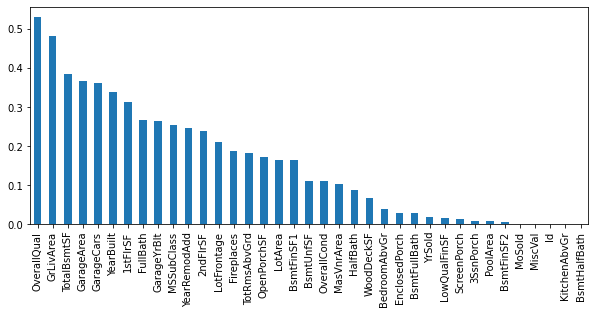

In [ ]:
### let's plot the ordered mutual_info values per features
mutual_info.sort_values(ascending=False).plot.bar(figsize=(10,4))

In [ ]:
from sklearn.feature_selection import SelectPercentile

In [ ]:
### Now we will select the top 20 percentiles
selected_top_cols = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_cols.fit(X_train.fillna(0), y_train)
X_train.columns[selected_top_cols.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageYrBlt', 'GarageCars', 'GarageArea'],
      dtype='object')

In [ ]:
selected_top_cols.get_support()

array([False, False, False, False,  True, False,  True, False, False,
       False, False, False,  True,  True, False, False,  True, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False])

In [ ]:
X_train.columns[selected_top_cols.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageYrBlt', 'GarageCars', 'GarageArea'],
      dtype='object')